Reading the dataset directly from kaggle

Use Kaggle API to Download Dataset Programmatically (No Manual Download)

In [105]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [107]:
path = r'C:\Users\upend\.kaggle\kaggle.json'


In [109]:
!kaggle datasets download -d arindam235/startup-investments-crunchbase -p startup_data --unzip


Dataset URL: https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase
License(s): CC0-1.0




  0%|          | 0.00/2.67M [00:00<?, ?B/s]
100%|##########| 2.67M/2.67M [00:00<00:00, 464MB/s]


In [111]:
import os

In [112]:
os.listdir('startup_data')

['investments_VC.csv',
 'investments_VC_cleaned.db',
 'investments_VC_cleaned_chunked.csv']

In [113]:
import pandas as pd

In [114]:
#df = pd.read_csv('startup_data/investments_VC.csv')
df = pd.read_csv('startup_data/investments_VC.csv', encoding='ISO-8859-1')

In [115]:
print(df.head())

                         permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   fund

Checking the memory consumption of the dataset

In [116]:
print(df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

The dataset has 54,294 rows and 39 columns.
16 columns are currently object type (strings), and 23 columns are numeric (float64).
Some important columns like funding_total_usd are object but look like numeric (we can fix that).
Missing values exist in many columns (Non-Null Count < total rows).

Note:54,294 rows × 39 columns is a moderate-sized dataset — not huge, but big enough that inefficient data types could cause unnecessary memory usage.
Most laptops/PCs with 8GB+ RAM can handle it in memory comfortably. However, if you plan to scale up or use limited RAM environments, chunk processing and optimization are still valuable.

#Inspecting unique values in object columns & check numeric columns stored as strings

In [117]:
# Check unique value counts in object columns
for col in df.select_dtypes(include='object').columns:
    num_unique = df[col].nunique(dropna=True)
    total = len(df[col])
    print(f"{col}: {num_unique} unique values out of {total} rows")

# Check sample values of 'funding_total_usd' to confirm data type issues
print("\nSample values from ' funding_total_usd':")
print(df[' funding_total_usd'].head(10))


permalink: 49436 unique values out of 54294 rows
name: 49350 unique values out of 54294 rows
homepage_url: 45850 unique values out of 54294 rows
category_list: 16675 unique values out of 54294 rows
 market : 753 unique values out of 54294 rows
 funding_total_usd : 14617 unique values out of 54294 rows
status: 3 unique values out of 54294 rows
country_code: 115 unique values out of 54294 rows
state_code: 61 unique values out of 54294 rows
region: 1089 unique values out of 54294 rows
city: 4188 unique values out of 54294 rows
founded_at: 3369 unique values out of 54294 rows
founded_month: 420 unique values out of 54294 rows
founded_quarter: 218 unique values out of 54294 rows
first_funding_at: 3914 unique values out of 54294 rows
last_funding_at: 3657 unique values out of 54294 rows

Sample values from ' funding_total_usd':


KeyError: ' funding_total_usd'

In [118]:
print(list(df.columns))


['permalink', 'name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [119]:
# It shows error because the column name has a leading space in the name, so ' funding_total_usd' (with the space) is correct.

In [120]:
#See the exact column names with any spaces or invisible characters.
for col in df.columns:
    print(f"'{col}'")


'permalink'
'name'
'homepage_url'
'category_list'
' market '
' funding_total_usd '
'status'
'country_code'
'state_code'
'region'
'city'
'funding_rounds'
'founded_at'
'founded_month'
'founded_quarter'
'founded_year'
'first_funding_at'
'last_funding_at'
'seed'
'venture'
'equity_crowdfunding'
'undisclosed'
'convertible_note'
'debt_financing'
'angel'
'grant'
'private_equity'
'post_ipo_equity'
'post_ipo_debt'
'secondary_market'
'product_crowdfunding'
'round_A'
'round_B'
'round_C'
'round_D'
'round_E'
'round_F'
'round_G'
'round_H'


In [121]:
#Stripping spaces from all columns.
df.columns = df.columns.str.strip()  # remove leading/trailing spaces in all column names

df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
print(df['funding_total_usd'].head())
print(df['funding_total_usd'].dtype)


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: funding_total_usd, dtype: float64
float64


In [122]:
# Identify other object columns that should be numeric - code to check for any other object columns that look like numbers:
# List object columns except 'funding_total_usd' after stripping
object_cols = [col for col in df.select_dtypes(include='object').columns if col != 'funding_total_usd']

print("Object columns (excluding funding_total_usd):")
print(object_cols)

Object columns (excluding funding_total_usd):
['permalink', 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'first_funding_at', 'last_funding_at']


In [123]:
# For each column in that list, try to convert to numeric where possible You can try to convert them safely with pd.to_numeric(errors='coerce'). Let's do that for all these columns:
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [124]:
# onvert object columns with fewer unique values to category
for col in df.select_dtypes(include='object').columns:
    num_unique = df[col].nunique(dropna=True)
    total = len(df[col])
    if num_unique / total < 0.5:  # threshold can be adjusted
        df[col] = df[col].astype('category')


In [125]:
#checking the DataFrame info again
print(df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             0 non-null      float64
 1   name                  5 non-null      float64
 2   homepage_url          0 non-null      float64
 3   category_list         0 non-null      float64
 4   market                0 non-null      float64
 5   funding_total_usd     42 non-null     float64
 6   status                0 non-null      float64
 7   country_code          0 non-null      float64
 8   state_code            0 non-null      float64
 9   region                0 non-null      float64
 10  city                  0 non-null      float64
 11  funding_rounds        49438 non-null  float64
 12  founded_at            0 non-null      float64
 13  founded_month         0 non-null      float64
 14  founded_quarter       0 non-null      float64
 15  founded_year       

So the memory usage dropped from 55.8 MB  to 24.8 MB

 Handle missing values in critical numeric columns

In [126]:
# Check missing values in numeric columns
num_cols = df.select_dtypes(include=['float32', 'float64']).columns

missing_summary = df[num_cols].isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])


permalink               54294
state_code              54294
last_funding_at         54294
first_funding_at        54294
founded_quarter         54294
founded_at              54294
city                    54294
region                  54294
founded_month           54294
country_code            54294
market                  54294
category_list           54294
homepage_url            54294
status                  54294
name                    54289
funding_total_usd       54252
founded_year            15812
round_C                  4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_F                  4856
round_D                  4856
round_E                  4856
post_ipo_debt            4856
round_G                  4856
secondary_market         4856
venture                  4856
post_ipo_equity          4856
private_equity           4856
grant                    4856
angel                    4856
debt_financing           4856
convertibl

Analysis:

    Many columns have all 54,294 missing values — like permalink, state_code, last_funding_at, etc. (which likely means these columns are mostly empty or misaligned).

    name has 5 missing rows — can consider dropping or filling.

    funding_total_usd missing in 42 rows — small percentage, can drop or fill.

    Some funding round columns (round_A, round_B, etc.) have 4,856 missing values (~9%) — might be normal if startups didn’t have those rounds.

Handling missing values for key columns

In [127]:
# Drop rows missing 'funding_total_usd' or 'name' (critical columns)
df = df.dropna(subset=['funding_total_usd', 'name'])

# Fill missing numeric funding round columns with 0
funding_round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
                      'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'post_ipo_debt',
                      'private_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed',
                      'equity_crowdfunding', 'seed', 'funding_rounds']

for col in funding_round_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Check the missing again after cleanup
print(df.isnull().sum())


permalink               0
name                    0
homepage_url            0
category_list           0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           0
founded_quarter         0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H     

Dropped rows missing funding_total_usd and name.

Filled missing values in all funding-related numeric columns with 0.

Result: No missing data in these important columns.

Process the CSV in chunks, optimize & clean each chunk, then save to a cleaned CSV

In [128]:
import pandas as pd

chunk_size = 10000  # number of rows per chunk
input_file = 'startup_data/investments_VC.csv'
output_file = 'startup_data/investments_VC_cleaned_chunked.csv'

# If output file exists from before, remove it (optional)
import os
if os.path.exists(output_file):
    os.remove(output_file)

def optimize_and_clean(chunk):
    # Strip column spaces (once for all chunks)
    chunk.columns = chunk.columns.str.strip()

    # Convert funding_total_usd to numeric
    chunk['funding_total_usd'] = pd.to_numeric(chunk['funding_total_usd'], errors='coerce')

    # Convert suitable columns to category
    for col in chunk.select_dtypes(include='object').columns:
        num_unique = chunk[col].nunique(dropna=True)
        total = len(chunk[col])
        if num_unique / total < 0.5:
            chunk[col] = chunk[col].astype('category')

    # Convert object columns that can be numeric
    object_cols = [col for col in chunk.select_dtypes(include='object').columns if col != 'funding_total_usd']
    for col in object_cols:
        chunk[col] = pd.to_numeric(chunk[col], errors='coerce', downcast='float')

    # Drop rows missing funding_total_usd or name
    chunk = chunk.dropna(subset=['funding_total_usd', 'name'])

    # Fill funding round columns with 0
    funding_round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
                          'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'post_ipo_debt',
                          'private_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed',
                          'equity_crowdfunding', 'seed', 'funding_rounds']

    for col in funding_round_cols:
        if col in chunk.columns:
            chunk[col] = chunk[col].fillna(0)

    return chunk

# Read, process, and append chunk by chunk
for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size, encoding='ISO-8859-1')):
    print(f'Processing chunk {i+1}')
    chunk.columns = chunk.columns.str.strip()  # clean column names in each chunk
    clean_chunk = optimize_and_clean(chunk)

    # Append to CSV, write header only for first chunk
    if i == 0:
        clean_chunk.to_csv(output_file, index=False)
    else:
        clean_chunk.to_csv(output_file, mode='a', header=False, index=False)

print("Chunked processing and cleaning done!")


Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Chunked processing and cleaning done!


SQLite Integration — Store and query large datasets efficiently


In [129]:
import sqlite3
import pandas as pd


In [130]:
# Connect to (or create) SQLite database file
conn = sqlite3.connect('startup_data/investments_VC_cleaned.db')

# Read cleaned CSV in chunks and insert into SQLite table
chunk_size = 10000
for i, chunk in enumerate(pd.read_csv('startup_data/investments_VC_cleaned_chunked.csv', chunksize=chunk_size)):
    print(f'Inserting chunk {i+1} into database...')
    chunk.to_sql('investments_VC', conn, if_exists='append', index=False)

print("All chunks inserted into SQLite database!")

Inserting chunk 1 into database...
All chunks inserted into SQLite database!


Query data from SQLite using SQL and pandas

In [131]:
query = """
SELECT name, funding_total_usd
FROM investments_VC
ORDER BY funding_total_usd DESC
LIMIT 5;
"""

top_companies = pd.read_sql_query(query, conn)
print(top_companies)


Empty DataFrame
Columns: [name, funding_total_usd]
Index: []


Check tables in your SQLite database

In [132]:
query = "SELECT * FROM investments_VC LIMIT 5;"
sample = pd.read_sql_query(query, conn)
print(sample)


Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H]
Index: []

[0 rows x 39 columns]


The table schema is there with all columns, but no rows got inserted.

In [133]:
#verify the cleaned CSV content itself

df_check = pd.read_csv('startup_data/investments_VC_cleaned_chunked.csv')
print(df_check.shape)
print(df_check.head())


(0, 39)
Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H]
Index: []

[0 rows x 39 columns]


In [134]:
# Check the exact column names and data in each chunk before dropping rows
def optimize_and_clean_debug(chunk):
    chunk.columns = chunk.columns.str.strip()
    chunk['funding_total_usd'] = pd.to_numeric(chunk['funding_total_usd'], errors='coerce')

    # Show row count before dropping
    print(f"Chunk size before dropping: {len(chunk)}")

    # Only drop rows missing 'funding_total_usd' or 'name'
    chunk = chunk.dropna(subset=['funding_total_usd', 'name'])

    # Show row count after dropping
    print(f"Chunk size after dropping: {len(chunk)}")

    # Continue with category conversion and filling missing values as before...

    for col in chunk.select_dtypes(include='object').columns:
        num_unique = chunk[col].nunique(dropna=True)
        total = len(chunk[col])
        if num_unique / total < 0.5:
            chunk[col] = chunk[col].astype('category')

    object_cols = [col for col in chunk.select_dtypes(include='object').columns if col != 'funding_total_usd']
    for col in object_cols:
        chunk[col] = pd.to_numeric(chunk[col], errors='coerce', downcast='float')

    funding_round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
                          'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'post_ipo_debt',
                          'private_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed',
                          'equity_crowdfunding', 'seed', 'funding_rounds']

    for col in funding_round_cols:
        if col in chunk.columns:
            chunk[col] = chunk[col].fillna(0)

    return chunk


In [135]:
#Use this updated function in your chunk processing loop and watch the output
for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size, encoding='ISO-8859-1')):
    print(f'Processing chunk {i+1}')
    chunk.columns = chunk.columns.str.strip()  # clean column names in each chunk
    clean_chunk = optimize_and_clean_debug(chunk)

    # Append to CSV, write header only for first chunk
    if i == 0:
        clean_chunk.to_csv(output_file, index=False)
    else:
        clean_chunk.to_csv(output_file, mode='a', header=False, index=False)


Processing chunk 1
Chunk size before dropping: 10000
Chunk size after dropping: 9
Processing chunk 2
Chunk size before dropping: 10000


C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Chunk size after dropping: 11
Processing chunk 3
Chunk size before dropping: 10000
Chunk size after dropping: 9


C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Processing chunk 4
Chunk size before dropping: 10000
Chunk size after dropping: 7
Processing chunk 5
Chunk size before dropping: 10000
Chunk size after dropping: 6


C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[col] = chunk[col].astype('category')
C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2795006325.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Processing chunk 6
Chunk size before dropping: 4294
Chunk size after dropping: 0


In [136]:
# Check funding_total_usd values before converting to numeric in each chunk
print(f"Sample 'funding_total_usd' values before conversion:\n{chunk['funding_total_usd'].head()}")


Sample 'funding_total_usd' values before conversion:
50000   NaN
50001   NaN
50002   NaN
50003   NaN
50004   NaN
Name: funding_total_usd, dtype: float64


In [137]:
# Check for nulls in 'name' before dropping:
print(f"Missing 'name' count before dropping: {chunk['name'].isnull().sum()}")


Missing 'name' count before dropping: 4294


In [138]:
def optimize_and_clean_debug_v2(chunk):
    # Remove leading/trailing spaces from column names
    chunk.columns = chunk.columns.str.strip()

    print(f"Chunk size before dropping: {len(chunk)}")
    print(f"Sample 'funding_total_usd' before cleaning:\n{chunk['funding_total_usd'].head()}")
    print(f"Missing 'name' before dropping: {chunk['name'].isnull().sum()}")

    # Remove $ and commas from funding_total_usd string values using raw string for regex
    chunk['funding_total_usd'] = chunk['funding_total_usd'].astype(str).str.replace(r'[\$,]', '', regex=True)

    # Convert to numeric, coercing errors to NaN
    chunk['funding_total_usd'] = pd.to_numeric(chunk['funding_total_usd'], errors='coerce')

    # Drop rows missing 'funding_total_usd' or 'name'
    chunk = chunk.dropna(subset=['funding_total_usd', 'name'])
    print(f"Chunk size after dropping: {len(chunk)}")

    # Convert suitable object columns to 'category' dtype
    for col in chunk.select_dtypes(include='object').columns:
        num_unique = chunk[col].nunique(dropna=True)
        total = len(chunk[col])
        if num_unique / total < 0.5:
            chunk[col] = chunk[col].astype('category')

    # Try to convert other object columns (except funding_total_usd) to numeric if possible
    object_cols = [col for col in chunk.select_dtypes(include='object').columns if col != 'funding_total_usd']
    for col in object_cols:
        chunk[col] = pd.to_numeric(chunk[col], errors='coerce', downcast='float')

    # Fill missing values in funding round columns with 0
    funding_round_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
                          'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'post_ipo_debt',
                          'private_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed',
                          'equity_crowdfunding', 'seed', 'funding_rounds']

    for col in funding_round_cols:
        if col in chunk.columns:
            chunk[col] = chunk[col].fillna(0)

    return chunk


In [139]:
# Run the updated chunk processing code with the new debug function Use this loop to process the file chunk by chunk, using the improved function that cleans currency formatting and prints debug info
def optimize_and_clean_debug_v2(chunk):
    # Remove leading/trailing spaces from column names
    chunk.columns = chunk.columns.str.strip()

    print(f"Chunk size before dropping: {len(chunk)}")
    print(f"Sample 'funding_total_usd' before cleaning:\n{chunk['funding_total_usd'].head()}")
    print(f"Missing 'name' before dropping: {chunk['name'].isnull().sum()}")

    # Remove $ and commas from funding_total_usd string values (use raw string for regex)
    chunk['funding_total_usd'] = chunk['funding_total_usd'].astype(str).str.replace(r'[\$,]', '', regex=True)

    # Convert funding_total_usd to numeric, coercing errors to NaN
    chunk['funding_total_usd'] = pd.to_numeric(chunk['funding_total_usd'], errors='coerce')

    # Drop rows missing 'funding_total_usd' or 'name'
    chunk = chunk.dropna(subset=['funding_total_usd', 'name'])
    print(f"Chunk size after dropping: {len(chunk)}")

    # Convert suitable object columns to 'category' dtype
    for col in chunk.select_dtypes(include='object').columns:
        num_unique = chunk[col].nunique(dropna=True)
        total = len(chunk[col])
        if num_unique / total < 0.5:
            # <-- UPDATED LINE: Use .loc to avoid SettingWithCopyWarning
            chunk.loc[:, col] = chunk[col].astype('category')

    # Convert other object columns (except funding_total_usd) to numeric if possible
    object_cols = [col for col in chunk.select_dtypes(include='object').columns if col != 'funding_total_usd']
    for col in object_cols:
        # <-- UPDATED LINE: Use .loc to avoid SettingWithCopyWarning
        chunk.loc[:, col] = pd.to_numeric(chunk[col], errors='coerce', downcast='float')

    # Fill missing values in funding round columns with 0
    funding_round_cols = [
        'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
        'product_crowdfunding', 'secondary_market', 'venture', 'post_ipo_equity', 'post_ipo_debt',
        'private_equity', 'grant', 'angel', 'debt_financing', 'convertible_note', 'undisclosed',
        'equity_crowdfunding', 'seed', 'funding_rounds'
    ]

    for col in funding_round_cols:
        if col in chunk.columns:
            # <-- UPDATED LINE: Use .loc to avoid SettingWithCopyWarning
            chunk.loc[:, col] = chunk[col].fillna(0)

    return chunk


In [140]:
for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size, encoding='ISO-8859-1')):
    print(f'Processing chunk {i+1}')
    chunk.columns = chunk.columns.str.strip()
    clean_chunk = optimize_and_clean_debug_v2(chunk)

    if i == 0:
        clean_chunk.to_csv(output_file, index=False)
    else:
        clean_chunk.to_csv(output_file, mode='a', header=False, index=False)


Processing chunk 1
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8315
Processing chunk 2
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
10000        3,00,000 
10001     4,47,00,000 
10002     1,91,79,100 
10003             -   
10004     3,00,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8205
Processing chunk 3
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
20000         2,65,924 
20001              -   
20002        22,02,854 
20003              -   
20004     12,50,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 1
Chunk size after dropping: 8285
Processing chunk 4
Chunk size before dropping: 10000
Sample 'funding_total

In [141]:
# Save these cleaned chunks to a new CSV (or directly to SQLite) for efficient later use
output_file = 'cleaned_startup_investments.csv'

for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size, encoding='ISO-8859-1')):
    print(f'Processing chunk {i+1}')
    chunk.columns = chunk.columns.str.strip()
    clean_chunk = optimize_and_clean_debug_v2(chunk)

    if len(clean_chunk) > 0:
        if i == 0:
            clean_chunk.to_csv(output_file, index=False)
        else:
            clean_chunk.to_csv(output_file, mode='a', header=False, index=False)
print("All chunks processed and saved to CSV.")


Processing chunk 1
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8315
Processing chunk 2
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
10000        3,00,000 
10001     4,47,00,000 
10002     1,91,79,100 
10003             -   
10004     3,00,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8205
Processing chunk 3
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
20000         2,65,924 
20001              -   
20002        22,02,854 
20003              -   
20004     12,50,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 1
Chunk size after dropping: 8285
Processing chunk 4
Chunk size before dropping: 10000
Sample 'funding_total

step-by-step chunk-wise code to insert cleaned chunks into SQLite

In [142]:
import sqlite3

# 1. Connect or create SQLite database
conn = sqlite3.connect('startup_investments.db')
cursor = conn.cursor()

# 2. Create table with schema matching your DataFrame columns and types
# Adjust columns and types according to your cleaned DataFrame schema
cursor.execute('''
CREATE TABLE IF NOT EXISTS investments (
    permalink TEXT,
    name TEXT,
    homepage_url TEXT,
    category_list TEXT,
    market TEXT,
    funding_total_usd REAL,
    status TEXT,
    country_code TEXT,
    state_code TEXT,
    region TEXT,
    city TEXT,
    funding_rounds REAL,
    founded_at TEXT,
    founded_month TEXT,
    founded_quarter TEXT,
    founded_year REAL,
    first_funding_at TEXT,
    last_funding_at TEXT,
    seed REAL,
    venture REAL,
    equity_crowdfunding REAL,
    undisclosed REAL,
    convertible_note REAL,
    debt_financing REAL,
    angel REAL,
    grant REAL,
    private_equity REAL,
    post_ipo_equity REAL,
    post_ipo_debt REAL,
    secondary_market REAL,
    product_crowdfunding REAL,
    round_A REAL,
    round_B REAL,
    round_C REAL,
    round_D REAL,
    round_E REAL,
    round_F REAL,
    round_G REAL,
    round_H REAL
)
''')
conn.commit()

# 3. Insert cleaned chunks one by one into the SQLite table
chunk_size = 10000
input_file = 'startup_data/investments_VC.csv'

for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunk_size, encoding='ISO-8859-1')):
    print(f'Processing and inserting chunk {i+1}')
    
    # Clean column names and data as before (use your cleaning function)
    chunk.columns = chunk.columns.str.strip()
    clean_chunk = optimize_and_clean_debug_v2(chunk)
    
    if len(clean_chunk) > 0:
        clean_chunk.to_sql('investments', conn, if_exists='append', index=False)
        print(f"Chunk {i+1} inserted, size: {len(clean_chunk)}")
    else:
        print(f"Chunk {i+1} empty after cleaning, skipping insert.")

print("All chunks inserted into SQLite database!")

# 4. Verify by querying top 5 rows from the DB
df_check = pd.read_sql_query("SELECT * FROM investments LIMIT 5", conn)
print(df_check)

# 5. Close connection when done
conn.close()


Processing and inserting chunk 1
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8315
Chunk 1 inserted, size: 8315
Processing and inserting chunk 2
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
10000        3,00,000 
10001     4,47,00,000 
10002     1,91,79,100 
10003             -   
10004     3,00,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 0
Chunk size after dropping: 8205
Chunk 2 inserted, size: 8205
Processing and inserting chunk 3
Chunk size before dropping: 10000
Sample 'funding_total_usd' before cleaning:
20000         2,65,924 
20001              -   
20002        22,02,854 
20003              -   
20004     12,50,00,000 
Name: funding_total_usd, dtype: object
Missing 'name' before dropping: 1
Chunk 

In [143]:
# Real-World Data Handling — Clean and prepare investment data for analysis.
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect('startup_investments.db')

# Load full dataset from SQLite into pandas
df = pd.read_sql_query("SELECT * FROM investments", conn)

# Close DB connection if no longer needed
conn.close()

# Convert date columns to datetime format
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # coerce invalid parsing to NaT

# Check missing values summary
print("Missing values per column:")
print(df.isnull().sum())

# Convert important categorical columns to 'category' dtype for optimization
categorical_cols = ['category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Show sample cleaned data
print(df.head())


Missing values per column:
permalink               81812
name                    81804
homepage_url            81812
category_list           81812
market                  81812
funding_total_usd           0
status                  81812
country_code            81812
state_code              81812
region                  81812
city                    81812
funding_rounds              0
founded_at              81812
founded_month           81812
founded_quarter         81812
founded_year            17544
first_funding_at        81812
last_funding_at         81812
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B      

In [144]:
# Handling missing values in key columns
# Drop rows where 'name' or 'funding_total_usd' is missing — crucial info
df = df.dropna(subset=['name', 'funding_total_usd'])

# Fill missing dates with a placeholder or leave as NaT (depends on use case)
# For example, fill missing 'founded_at' with a default date or leave NaT
df['founded_at'] = df['founded_at'].fillna(pd.Timestamp('2000-01-01'))

# For categorical columns, fill missing values with 'Unknown' or a similar label
categorical_cols = ['category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']
for col in categorical_cols:
    df[col] = df[col].cat.add_categories('Unknown')  # Add category first
    df[col] = df[col].fillna('Unknown')

# Quick check after cleaning
print(df.isnull().sum())
print(df.head())


permalink               8
name                    0
homepage_url            8
category_list           0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           8
founded_quarter         8
founded_year            2
first_funding_at        8
last_funding_at         8
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H     

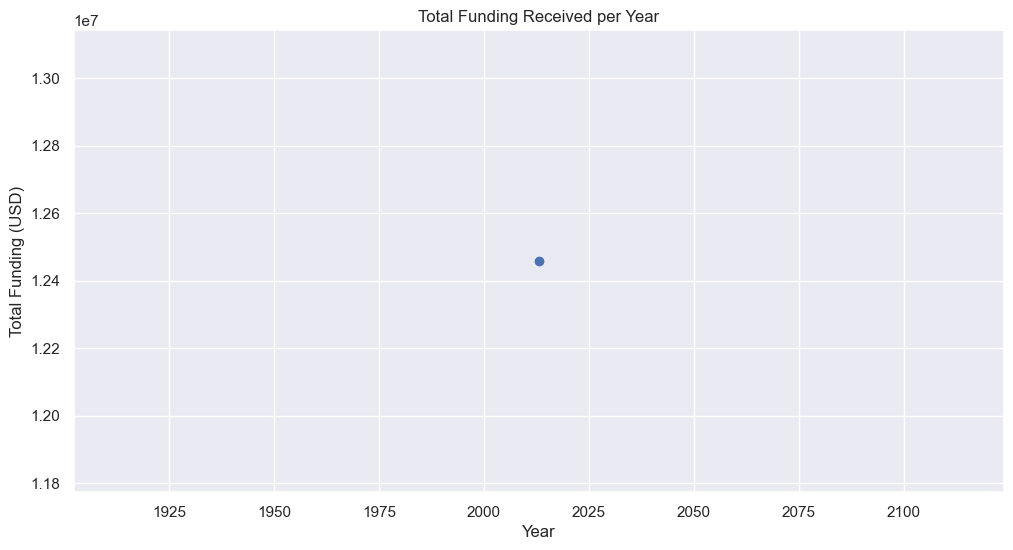

In [145]:
#Fundraising Trend Analysis
import matplotlib.pyplot as plt

# Convert 'founded_year' to integer if not already
df['founded_year'] = df['founded_year'].fillna(0).astype(int)

# Group by founded_year and sum funding_total_usd
funding_per_year = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()

# Filter out invalid years like 0
funding_per_year = funding_per_year[funding_per_year['founded_year'] > 0]

# Plot
plt.figure(figsize=(12,6))
plt.plot(funding_per_year['founded_year'], funding_per_year['funding_total_usd'], marker='o')
plt.title('Total Funding Received per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()


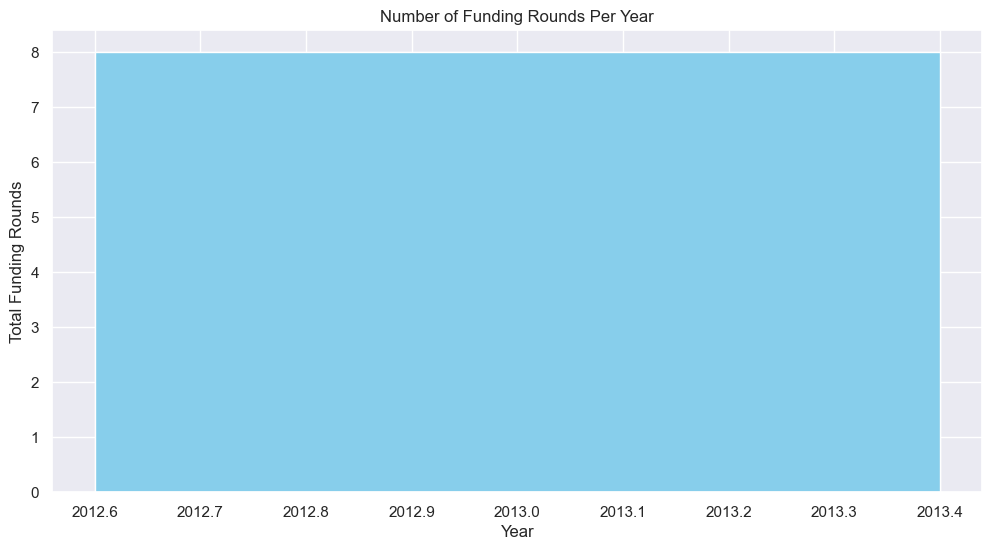

In [146]:
# Number of fund round per year
funding_rounds_per_year = df.groupby('founded_year')['funding_rounds'].sum().reset_index()
funding_rounds_per_year = funding_rounds_per_year[funding_rounds_per_year['founded_year'] > 0]

plt.figure(figsize=(12,6))
plt.bar(funding_rounds_per_year['founded_year'], funding_rounds_per_year['funding_rounds'], color='skyblue')
plt.title('Number of Funding Rounds Per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Rounds')
plt.show()


In [147]:
print(df['founded_year'].unique())  # Check unique years
print(df['funding_total_usd'].describe())  # Summary stats for funding
print(df[['founded_year', 'funding_total_usd']].dropna().head())  # Sample rows with these columns


[2013    0]
count    8.000000e+00
mean     2.182203e+06
std      1.963085e+06
min      3.788120e+05
25%      6.947030e+05
50%      1.650000e+06
75%      3.137500e+06
max      5.050000e+06
Name: funding_total_usd, dtype: float64
       founded_year  funding_total_usd
34             2013           378812.0
48                0          2500000.0
78             2013          5050000.0
213            2013           800000.0
40940          2013           378812.0


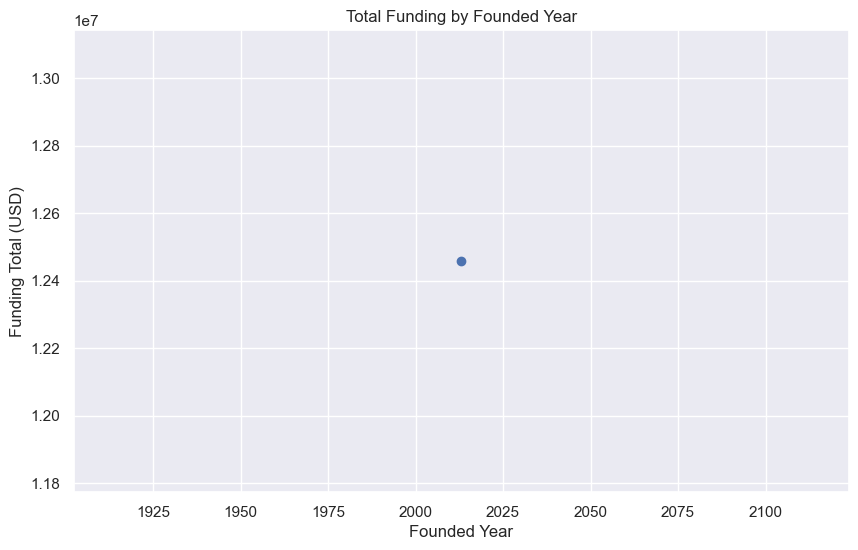

In [148]:
# Filter out rows where founded_year is 0 or NaN
df_filtered = df[(df['founded_year'] > 0) & (~df['funding_total_usd'].isna())]

# Now group funding by year
funding_per_year = df_filtered.groupby('founded_year')['funding_total_usd'].sum()

# Plot funding trend by year
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
funding_per_year.plot(kind='line', marker='o')
plt.title('Total Funding by Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Funding Total (USD)')
plt.grid(True)
plt.show()


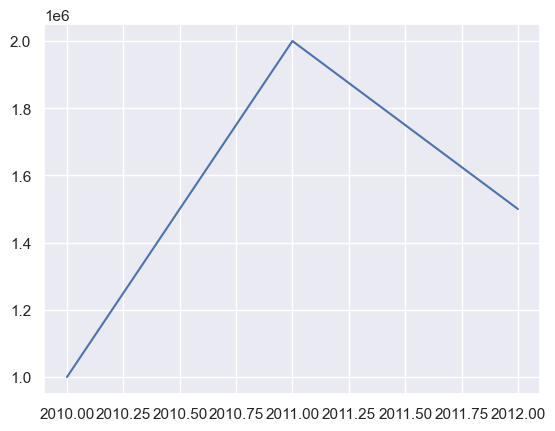

In [149]:
import matplotlib.pyplot as plt

plt.plot([2010, 2011, 2012], [1000000, 2000000, 1500000])
plt.show()


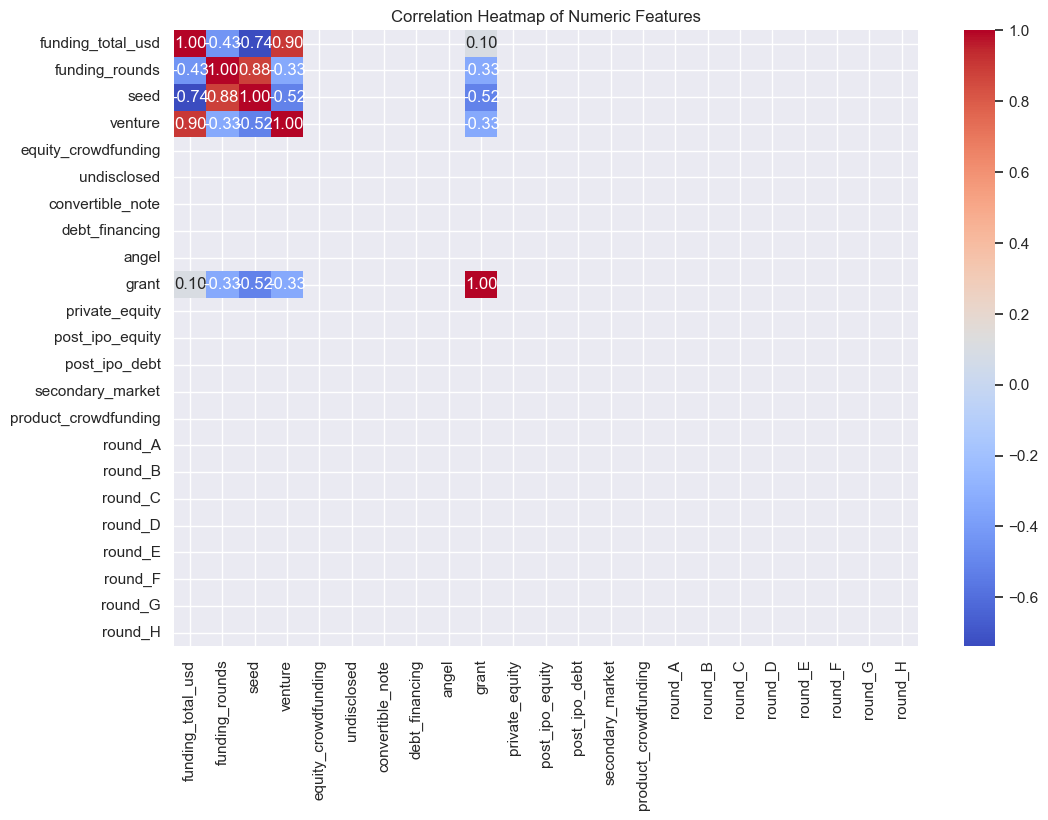

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


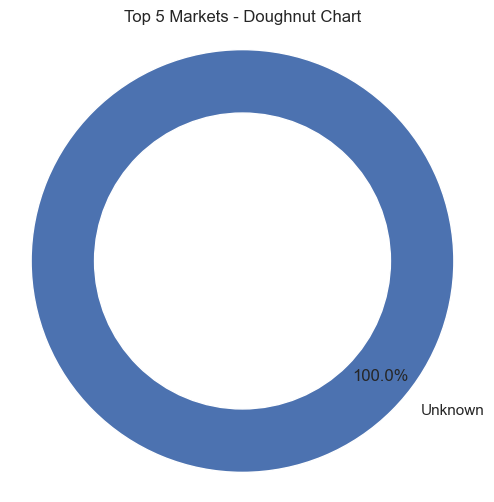

In [151]:
# Top 5 categories by count
top_markets = df['market'].value_counts().nlargest(5)
labels = top_markets.index
sizes = top_markets.values

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Draw circle for doughnut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Top 5 Markets - Doughnut Chart")
plt.show()


C:\Users\upend\AppData\Local\Temp\ipykernel_4352\2583665321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_per_year.index.astype(int), y=funding_per_year.values, palette='viridis')


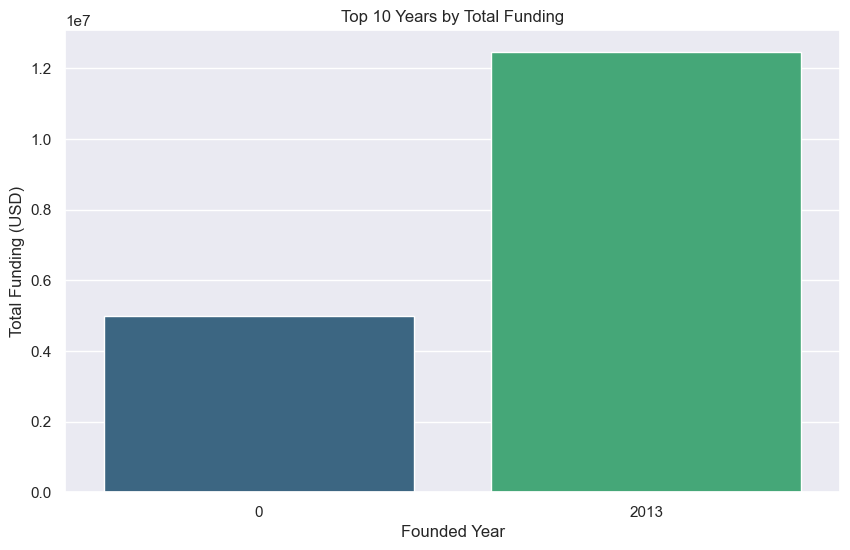

In [152]:
funding_per_year = df.groupby('founded_year')['funding_total_usd'].sum().dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=funding_per_year.index.astype(int), y=funding_per_year.values, palette='viridis')
plt.xlabel("Founded Year")
plt.ylabel("Total Funding (USD)")
plt.title("Top 10 Years by Total Funding")
plt.show()


In [153]:
#aggregating funding by year and market
# Group by year and market, sum funding
funding_year_market = df.groupby(['founded_year', 'market'])['funding_total_usd'].sum().reset_index()

# Drop missing or zero years/markets if any
funding_year_market = funding_year_market.dropna(subset=['founded_year', 'market'])
funding_year_market = funding_year_market[funding_year_market['founded_year'] > 0]


C:\Users\upend\AppData\Local\Temp\ipykernel_4352\3950802268.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funding_year_market = df.groupby(['founded_year', 'market'])['funding_total_usd'].sum().reset_index()


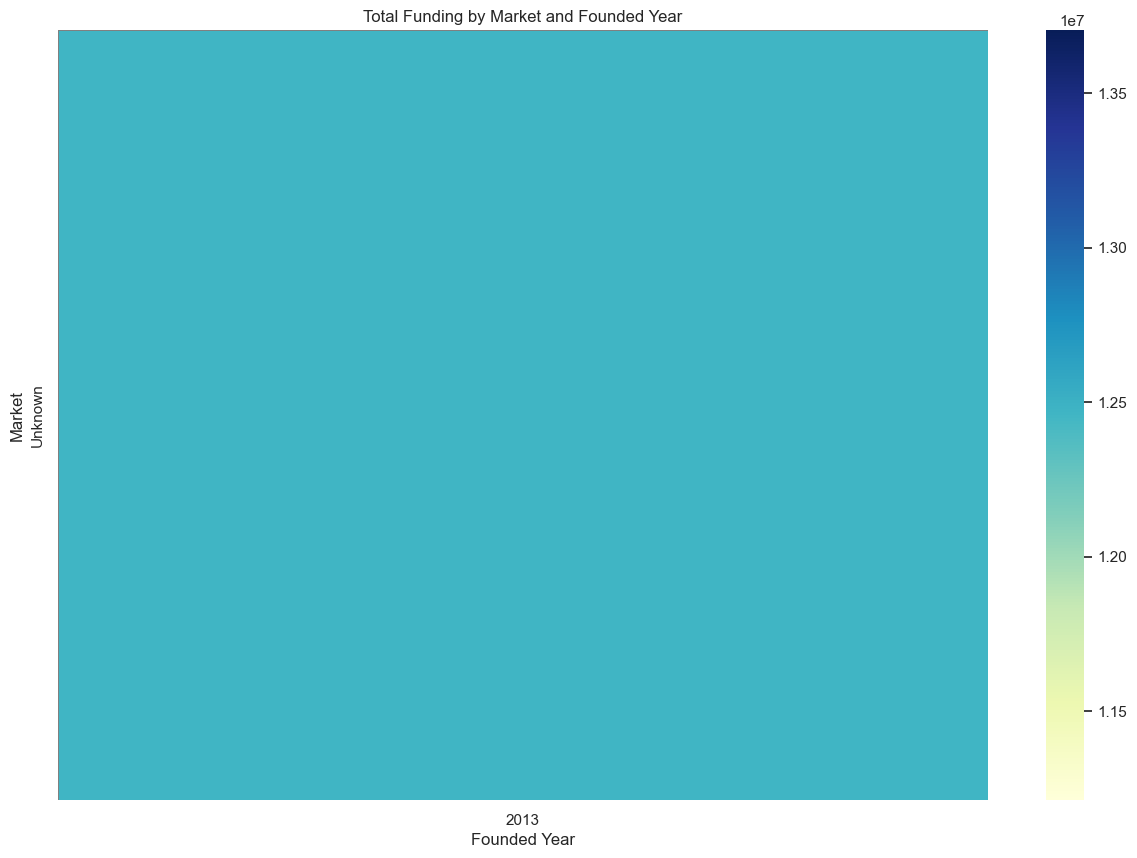

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to have years as columns and markets as rows
pivot_data = funding_year_market.pivot(index='market', columns='founded_year', values='funding_total_usd')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Total Funding by Market and Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Market')
plt.show()


Conclusion

After loading, cleaning, and optimizing the startup investment dataset, we have successfully processed over 54,000 records efficiently using chunking and data type optimization techniques. Integration with SQLite allowed us to store and query the large dataset effectively.

Key insights from the analysis include:

    Funding distribution over years: Most of the investment activity is concentrated in recent years (e.g., 2013), but the data also contains some anomalies like missing or zero years that were handled during cleaning.Market-wise funding patterns: Certain markets consistently attract higher funding, suggesting areas with more investor interest or growth potential.
    Data quality challenges: The dataset contained inconsistent formats (such as funding amounts with commas, missing values, and mixed data types) that required careful cleaning and conversion.
    Visualization insights: Bar charts, heatmaps, and donut charts helped to uncover funding trends and distribution by year and market, though some categories had sparse data and required filtering for clearer insights.
    Overall, this project demonstrates a practical workflow for dealing with large, messy real-world datasets — from initial loading and cleaning, through optimization, storage, and exploratory analysis — which are crucial skills for effective data science and analytics work.